In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### Question- 
In this challenge, Prateek bhayia gives you walkatime data of his past students and how they performed in the evaluation exam. Your task is to predict the score you will get given the amount of time you spend on coding daily.

Input You are given one feature corresponding to time noted by walkatime.

Output A scalar denoting the level of perfomance student achived by devoting the given time.

Download the training data and upload your predictions for the testcases given below.

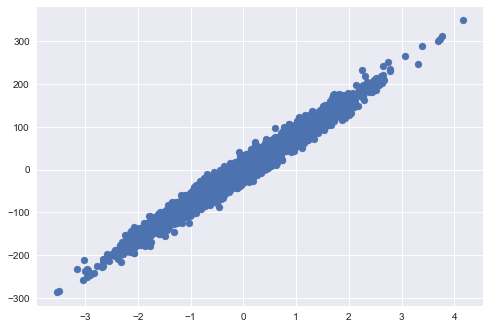

In [2]:
x = pd.read_csv('./dataset/Linear_X_Train.csv')
y= pd.read_csv('./dataset/Linear_Y_Train.csv')
X=x.values
Y=y.values
#normalisation
u=X.mean()
std=X.std()
X=(X-u)/std

plt.style.use('seaborn')
plt.scatter(X,Y)
plt.show()

In [3]:
def hypothesis(x,theta):
    y_= theta[0]+theta[1]*x
    return y_
def gradient(X,Y,theta):
    m=X.shape[0]
    grad=np.zeros((2,))
    for i in range(m):
        y_=hypothesis(X[i],theta)
        y=Y[i]
        grad[0]+=(y_-y)
        grad[1]+=((y_-y)*X[i])
    return grad/m


def error(X,Y,theta):
    m=X.shape[0]
    total_error=0.0
    for i in range(m):
        y_=hypothesis(X[i],theta)
        total_error+=(y_-Y[i])**2
    return total_error/m

def gradientdescent(X,Y,max_steps=100,learning_rate=0.1):
    theta = np.zeros((2,))
    error_list=[]
    
    for i in range(max_steps):
        grad=gradient(X,Y,theta)
        e=error(X,Y,theta)
        error_list.append(e)
        theta[0]=theta[0]-learning_rate*grad[0]
        theta[1]=theta[1]-learning_rate*grad[1]
    return theta,error_list

In [4]:
theta,error_list=gradientdescent(X,Y)
print(theta)
print(error_list)

[ 0.6838508  79.90361453]
[array([6576.35005246]), array([5363.12510257]), array([4380.41289317]), array([3584.41600355]), array([2939.65852295]), array([2417.40496367]), array([1994.37958066]), array([1651.72902041]), array([1374.18206661]), array([1149.36903404]), array([967.27047765]), array([819.77064698]), array([700.29578413]), array([603.52114523]), array([525.13368772]), array([461.63984713]), array([410.20983626]), array([368.55152745]), array([334.80829731]), array([307.47628091]), array([285.33734761]), array([267.40481165]), array([252.87945752]), array([241.11392067]), array([231.58383582]), array([223.8644671]), array([217.61177843]), array([212.54710061]), array([208.44471157]), array([205.12177646]), array([202.43019901]), array([200.25002128]), array([198.48407732]), array([197.05366271]), array([195.89502687]), array([194.95653185]), array([194.19635088]), array([193.58060429]), array([193.08184956]), array([192.67785822]), array([192.35062524]), array([192.08556653])

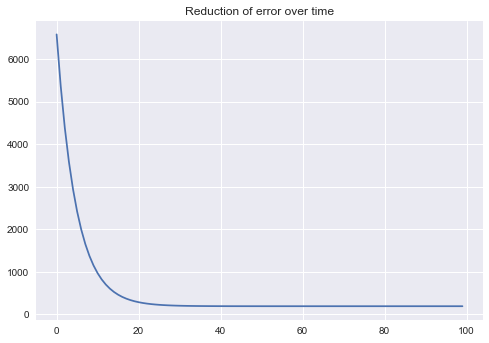

In [5]:
plt.plot(error_list)
plt.title("Reduction of error over time")
plt.show()

In [6]:
y_ = hypothesis(X,theta)
print(y_)

[[-19.5733619 ]
 [-43.69571729]
 [ 86.4848761 ]
 ...
 [-20.85044708]
 [138.70197319]
 [-35.87897262]]


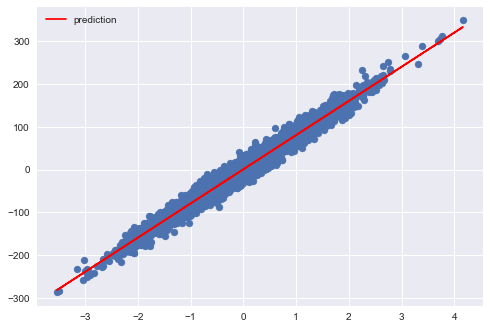

In [8]:
plt.scatter(X,Y)
plt.plot(X,y_,color='red',label="prediction")
plt.legend()
plt.show()

In [9]:
x_test=pd.read_csv('./TestCases/Linear_X_Test.csv')
X_test=x_test.values
y_test=hypothesis(X_test,theta)


In [10]:
df=pd.DataFrame(data=y_test,columns=["y"])

In [11]:
df.to_csv('y_prediction.csv',index=False)

## Computing

In [12]:
def r2score(Y,y_):
    num=np.sum((Y-y_)**2)
    denom=np.sum((Y-Y.mean())**2)
    score= (1-(num/denom))*100
    return score

In [13]:
r2score(Y,y_)

97.09612226971643